# TITLE: Movie Recommendation system
## Collaborators
1. Ezra Kipchirchir
2. Sharon Kaliku
3. Mercy Tegekson
4. Robinson Mumo
5. Allen Maina
6. Candy Gudda

### Project Overview



### Introduction



### Challenges




### Proposed solutions



### Problem statement



### Data understanding
`movieId`: Identifier for a movie.
#
`title`: The title of the movie.
#
`genres`: The genres associated with the movie.
#
`userId_x`: User identifier from the first DataFrame.
#
`rating`: Rating given by a user for a particular movie.
#
`timestamp_x`: Timestamp of the rating from the first DataFrame.
#
`userId_y`: User identifier from the second DataFrame.
#
`tag`: Tag associated with a movie from the second DataFrame.
#
`timestamp_y`: Timestamp of the tag from the second DataFrame.
#
`imdbId`: IMDb identifier for the movie.
#
`tmdbId`: TMDb (The Movie Database) identifier for the movie.`

#### 1. Importing the required libraries and modules for our project

In [171]:
# importing modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from functools import reduce
from datetime import datetime


#### 1.2 loading and doing the necessary inspection on our data

In [172]:
links = pd.read_csv("data/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [173]:
movies = pd.read_csv("data/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [174]:
ratings = pd.read_csv("data/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [175]:
tags = pd.read_csv("data/tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### 1.2 Merging our four datasets into one dataframe 

In [176]:
# List of DataFrames to merge
dataframes = [movies, ratings, tags, links]

# Use reduce() and pd.merge() to merge the DataFrames
merged_data = reduce(lambda left, right: pd.merge(left, right, on= "movieId"), dataframes)
#inspecting the first five rows
merged_data.head()


,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825,114709,862.0


Changing rating timestamp and tag timestamp to human readable format for easy analysis

In [181]:
#converting to pandas datetime object
merged_data["timestamp_x"] = pd.to_datetime(merged_data["timestamp_x"])
merged_data["timestamp_y"] = pd.to_datetime(merged_data["timestamp_y"])
#using dt.strftime() method since it is pandas timestamp format
merged_data["rating_timestamp"] = merged_data["timestamp_x"].dt.strftime("%Y-%m-%d %H:%M:%S")
merged_data["tag_timestamp"] = merged_data["timestamp_y"].dt.strftime("%Y-%m-%d %H:%M:%S")
merged_data.drop(columns=["timestamp_x", "timestamp_y"], axis= 1).head()


,movieId,title,genres,userId_x,rating,userId_y,tag,imdbId,tmdbId,rating_timestamp,tag_timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,336,pixar,114709,862.0,1970-01-01 00:00:00,1970-01-01 00:00:01
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,474,pixar,114709,862.0,1970-01-01 00:00:00,1970-01-01 00:00:01
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,567,fun,114709,862.0,1970-01-01 00:00:00,1970-01-01 00:00:01
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,336,pixar,114709,862.0,1970-01-01 00:00:00,1970-01-01 00:00:01
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,474,pixar,114709,862.0,1970-01-01 00:00:00,1970-01-01 00:00:01


In [178]:
#info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           233213 non-null  int64         
 1   title             233213 non-null  object        
 2   genres            233213 non-null  object        
 3   userId_x          233213 non-null  int64         
 4   rating            233213 non-null  float64       
 5   timestamp_x       233213 non-null  datetime64[ns]
 6   userId_y          233213 non-null  int64         
 7   tag               233213 non-null  object        
 8   timestamp_y       233213 non-null  datetime64[ns]
 9   imdbId            233213 non-null  int64         
 10  tmdbId            233213 non-null  float64       
 11  rating_timestamp  233213 non-null  object        
 12  tag_timestamp     233213 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memor

Our data seems to have no null values nor missing data
#
We will go ahed and do summary statistics for our numerical columns

In [179]:
#summary statistics
merged_data.describe()

,movieId,userId_x,rating,timestamp_x,userId_y,timestamp_y,imdbId,tmdbId
count,233213.000000,233213.000000,233213.000000,233213,233213.000000,233213,2.332130e+05,233213.000000
mean,12319.999443,309.688191,3.966535,1970-01-01 00:00:01.213524005,470.683564,1970-01-01 00:00:01.384773812,2.610632e+05,9378.277742
min,1.000000,1.000000,0.500000,1970-01-01 00:00:00.828124615,2.000000,1970-01-01 00:00:01.137179352,1.234900e+04,11.000000
25%,296.000000,156.000000,3.500000,1970-01-01 00:00:01.017364566,424.000000,1970-01-01 00:00:01.242494304,1.103570e+05,278.000000
50%,1198.000000,309.000000,4.000000,1970-01-01 00:00:01.217324757,477.000000,1970-01-01 00:00:01.457901245,1.109120e+05,680.000000
75%,4638.000000,460.000000,5.000000,1970-01-01 00:00:01.443201070,599.000000,1970-01-01 00:00:01.498456617,1.724950e+05,1892.000000
max,193565.000000,610.000000,5.000000,1970-01-01 00:00:01.537799250,610.000000,1970-01-01 00:00:01.537098603,5.580390e+06,503475.000000
std,28243.919401,178.206387,0.968637,NaN,153.329632,NaN,4.414411e+05,36943.139800


### 2. Exploratory Data Analysis
Now that our data is clean and ready for use, we are going to visualize our data. Plotting graphs and visuals is the main thing we are doing here in order to further understand visually what our data is communicating. We will tools such as `seaborn` and `matplotlib`
#
#### 2.1 Univariate analysis


In [187]:
#writting helper function to help us make x-axis countplots in our EDA process
def sns_xcount(column , data):
    sns.countplot(x = column, data = data, hue= column)
    plt.title(f"{column} count in our data set")
    plt.show();

#writting helper function to help us make y-axis countplots in our EDA process
def sns_ycount(column , data):
    sns.countplot(y = column, data = data)
    plt.title(f"{column} count in our data set")
    plt.show();

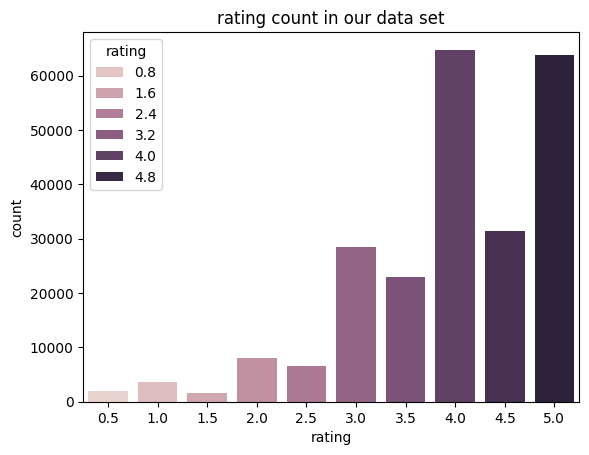

In [188]:
sns_xcount("rating", merged_data)